In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg
import os

In [3]:
plt.style.use('../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [4]:
halo_smooth = np.linspace(11, 14, 100)

In [5]:
test = []

for file in os.listdir("../data/"):

    if file.endswith("h5"):

        ii = jsm_ancillary.load_sample("../data/"+file)

        print("loaded", file)

        test.append([np.log10(ii.host_mass.values), np.log10(1/(1+ii.host_z50.values)), np.log10(ii.N_pres3.values)])

loaded 11.2_files.h5
loaded 11.8_files.h5
loaded 13.4_files.h5
loaded 12.6_files.h5
loaded 13.2_files.h5
loaded 12.0_files.h5
loaded 13.8_files.h5
loaded 11.4_files.h5
loaded 12.4_files.h5
loaded 14.0_files.h5
loaded 13.6_files.h5
loaded 11.0_files.h5
loaded 11.6_files.h5
loaded 12.2_files.h5
loaded 13.0_files.h5
loaded 12.8_files.h5


In [6]:
def consolidate(test_index):

    host_mass = test_index[0][0] 
    z50_quant = np.percentile(test_index[1], np.array([16, 50, 84]))
    Nsub_quant = np.percentile(test_index[2], np.array([16, 50, 84]))

    return host_mass, z50_quant, Nsub_quant

In [7]:
import matplotlib as mpl

vmin, vmax = 11.0, 14.0
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.viridis

zorder_min = 1
zorder_max = 10

def quadrant_percentages_plot(x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    valid = (x != 0) & (y != 0)
    x, y = x[valid], y[valid]
    total = len(x)

    q1 = np.sum((x > 0) & (y > 0)) / total * 100
    q2 = np.sum((x < 0) & (y > 0)) / total * 100
    q3 = np.sum((x < 0) & (y < 0)) / total * 100
    q4 = np.sum((x > 0) & (y < 0)) / total * 100

    txt = [f"{q1:.1f}%", f"{q4:.1f}%", f"{q3:.1f}%", f"{q2:.1f}%"]

    rho = jsm_stats.correlation(x, y)

    return txt, f"{rho:.3f}"

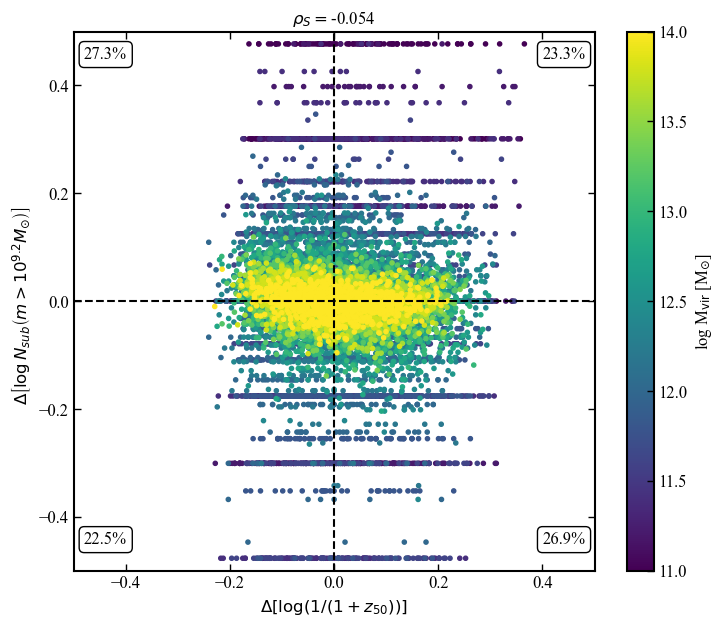

In [10]:
fig, ax = plt.subplots(figsize=(double_textwidth*1.2, double_textwidth))

xvals = []
yvals = []

for i in test:
    host_mass, z50_quant, Nsub_quant = consolidate(i)

    delta_z50_i =  i[1] - z50_quant[1]
    delta_Nsub_i = i[2] - Nsub_quant[1]

    xvals.extend(delta_z50_i)
    yvals.extend(delta_Nsub_i)
    
    color = cmap(norm(i[0]))  # map scalar → color
    zorder = zorder_min + (zorder_max - zorder_min) * norm(i[0][0])

    ax.scatter(delta_z50_i, delta_Nsub_i, marker=".", color=color, zorder=zorder)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # required for older matplotlib versions

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("log M$_{\\rm vir}$ [M$_{\\odot}$]")

ax.set_xlabel("$\\Delta [\\log (1/(1+z_{50}))] $")
ax.set_ylabel("$\\Delta \\left[\\log N_{sub} \\left(m > 10^{9.2} M_{\\odot} \\right) \\right]$  ")

ax.axhline(0, ls="--", color="k", zorder=11)
ax.axvline(0, ls="--", color="k", zorder=11)

ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-0.5, 0.5)

qs, rho = quadrant_percentages_plot(xvals, yvals)

ax.set_title("$\\rho_S =$"+rho)
ax.text(0.9, 0.95, qs[0], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.9, 0.05, qs[1], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.02, 0.05, qs[2], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.02, 0.95, qs[3], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))


plt.show()